Name: Tran Thai Duc Hieu  
4-digit code: 8f95  
Email: t.tran@oth-aw.de  

# Used source
Used source is described in **used_source.ipynb**

# 4. Data quality check

## Walking data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

FILE_PATH = 'position_estimation.csv'

def loadData(file_path):
    data = np.loadtxt(file_path, delimiter=',', skiprows=1)    
    return data


In [2]:
walking_data = loadData(FILE_PATH)
walking_data[:, 0] = walking_data[:, 0] - walking_data[0, 0]

timestamp = walking_data[:,0]

# Calculate the time difference between each sample
d = timestamp[1:] - timestamp[:-1]
time_diff = pd.DataFrame(d, columns=['time_diff'])
time_diff.describe()

,time_diff
count,4756.000000
mean,30.893608
std,4.381640
min,17.000000
25%,28.000000
50%,31.000000
75%,34.000000
max,50.000000


Unique sampling intervals:
 [17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 50.]
Counts of unique sampling intervals:
 [  1   2   8  21  34  65  83 130 188 229 274 348 419 407 424 442 388 348
 259 209 170 106  74  53  29  19  12   2   9   2   1]
---------------------------------
Intervals values that appear more than 100 times:
 [24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38.]
Counts of most frequent sampling intervals:
 [130 188 229 274 348 419 407 424 442 388 348 259 209 170 106]


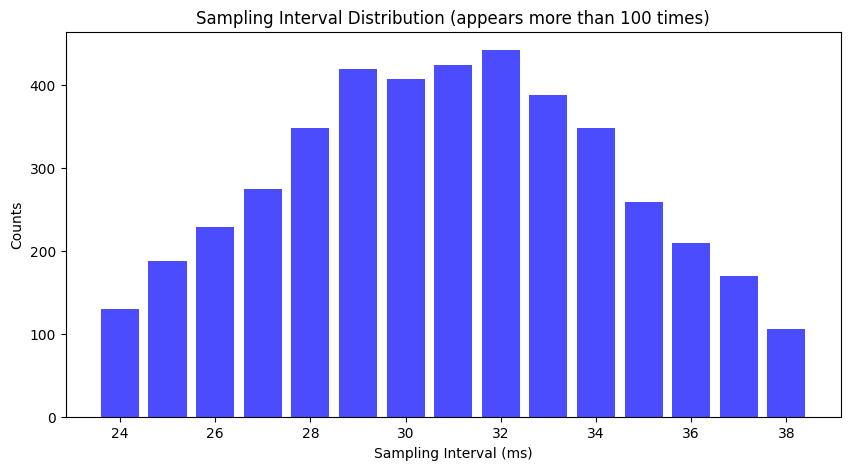

In [3]:
values, counts = np.unique(d, return_counts=True)
print('Unique sampling intervals:\n',values)
print('Counts of unique sampling intervals:\n',counts)
print('---------------------------------')

rate_significant = values[counts > 100]
counts_significant = counts[counts > 100]
print('Intervals values that appear more than 100 times:\n', rate_significant)    
print('Counts of most frequent sampling intervals:\n', counts_significant)

# Plot the sampling intervals   
plt.figure(figsize=(10,5))
plt.bar(rate_significant, counts_significant, color='blue', alpha=0.7)
plt.xlabel('Sampling Interval (ms)')
plt.ylabel('Counts')
plt.title('Sampling Interval Distribution (appears more than 100 times)')
plt.show()



In [4]:
most_frequent_interval_mean = np.mean(rate_significant)
print('Sampling rate (Hz) = 1 / sampling_interval(s)')
print(f'Sampling rate (Hz) = 1 / ({most_frequent_interval_mean} / 1000)')
print(f'Sampling rate (Hz) = {1000 / most_frequent_interval_mean:.2f} Hz')

Sampling rate (Hz) = 1 / sampling_interval(s)
Sampling rate (Hz) = 1 / (31.0 / 1000)
Sampling rate (Hz) = 32.26 Hz


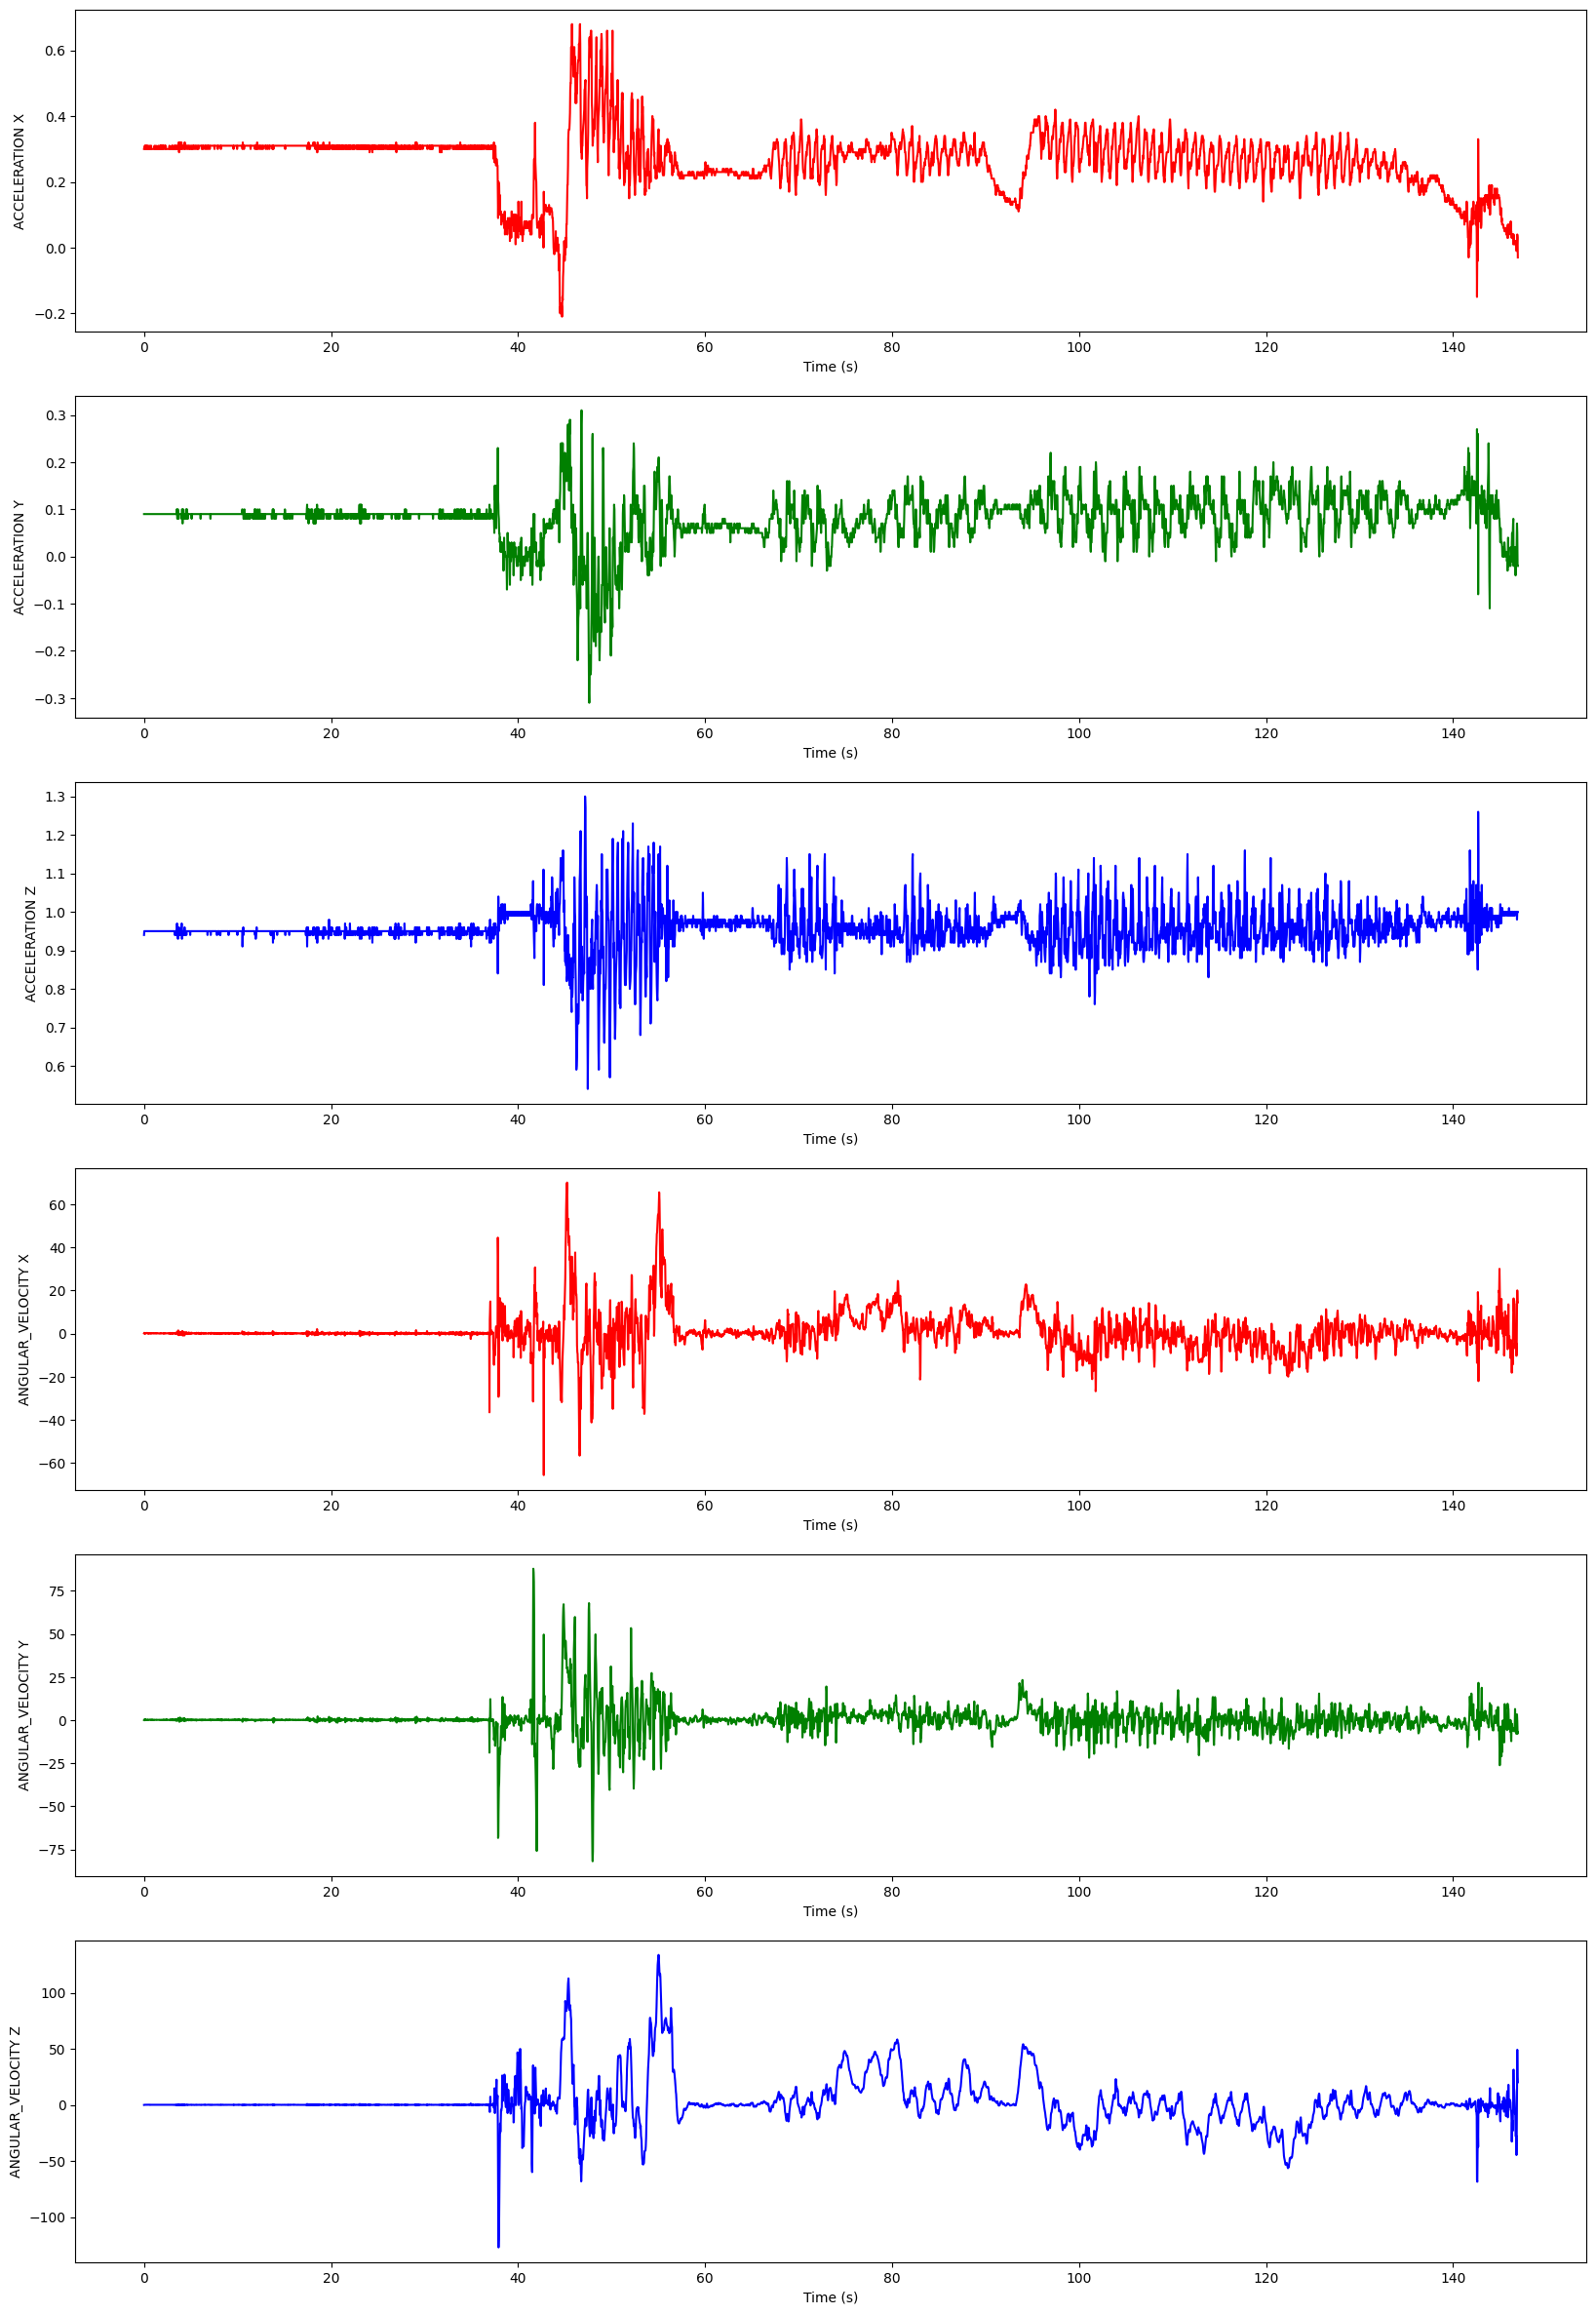

In [5]:
def plotData2(data):
    # Desciption: 
    # Plot all three axes of acceleration, angular velocity
    
    time = data[:, 0] / 1000  # Convert to seconds

    data_dict = {
        'acceleration': data[:, 1:4],
        'angular_velocity': data[:, 4:7],
    }

    plt.figure(figsize=(20, 30))

    row = 1
    for key in ['acceleration', 'angular_velocity']:
        for i, data_axis in enumerate(['x', 'y', 'z']):
            plt.subplot(6, 1, row)
            plt.plot(time, data_dict[key][:, i], color='r' if i == 0 else 'g' if i == 1 else 'b')
            plt.ylabel(key.upper() + ' ' + data_axis.upper())
            plt.xlabel('Time (s)')
            row = row + 1

    plt.show() 

plotData2(walking_data)

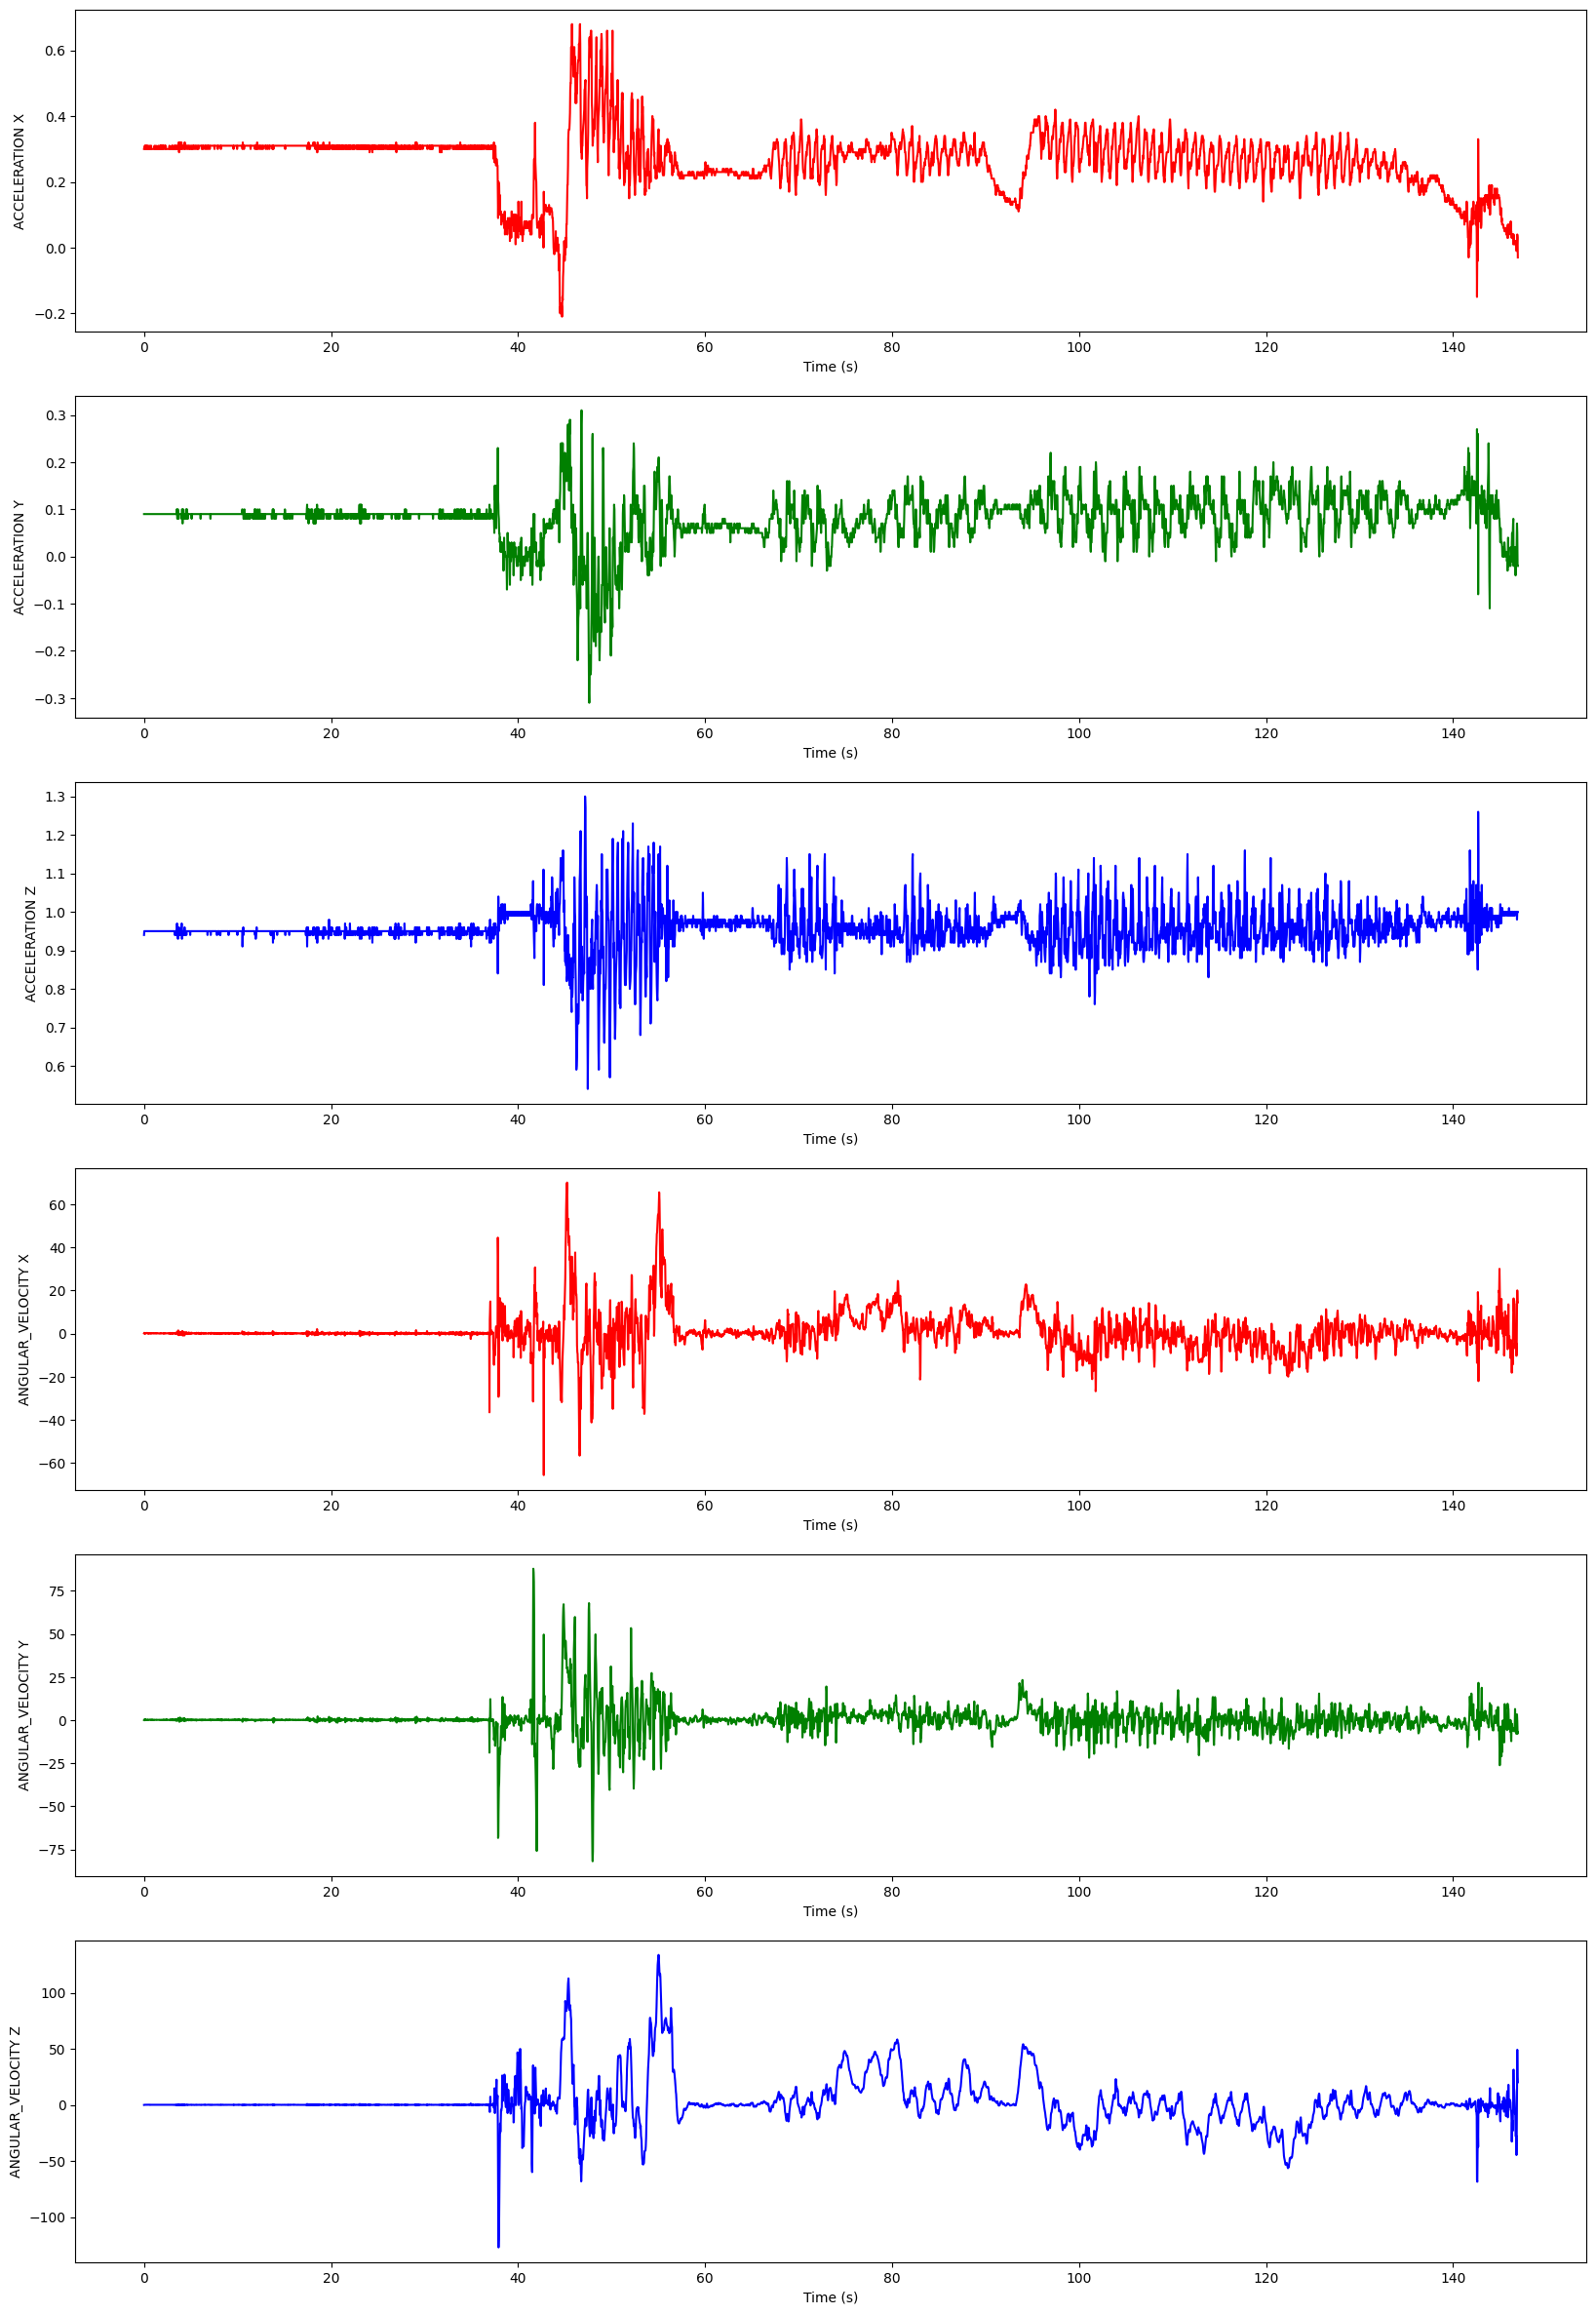

In [6]:
def plotData2(data):
    # Desciption: 
    # Plot all three axes of acceleration, angular velocity
    
    time = data[:, 0] / 1000  # Convert to seconds

    data_dict = {
        'acceleration': data[:, 1:4],
        'angular_velocity': data[:, 4:7],
    }

    plt.figure(figsize=(20, 30))

    row = 1
    for key in ['acceleration', 'angular_velocity']:
        for i, data_axis in enumerate(['x', 'y', 'z']):
            plt.subplot(6, 1, row)
            plt.plot(time, data_dict[key][:, i], color='r' if i == 0 else 'g' if i == 1 else 'b')
            plt.ylabel(key.upper() + ' ' + data_axis.upper())
            plt.xlabel('Time (s)')
            row = row + 1

    plt.show() 

plotData2(walking_data)

## Multiple actions data

In [ ]:
FILE_PATH = 'data/imu_data_mix.csv'
data = loadData(FILE_PATH)
data[:, 0] = data[:, 0] - data[0, 0]

timestamp = data[:,0]

# Calculate the time difference between each sample
d = timestamp[1:] - timestamp[:-1]
time_diff = pd.DataFrame(d, columns=['time_diff'])
time_diff.describe()

,time_diff
count,3229.000000
mean,18.589037
std,2.603594
min,10.000000
25%,18.000000
50%,19.000000
75%,20.000000
max,25.000000


Unique sampling intervals:
 [10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25.]
Counts of unique sampling intervals:
 [ 25  64  68  31  25 105 205 206 448 922 800  66  64  74  84  42]
---------------------------------
Intervals values that appear more than 100 times:
 [15. 16. 17. 18. 19. 20.]
Counts of most frequent sampling intervals:
 [105 205 206 448 922 800]


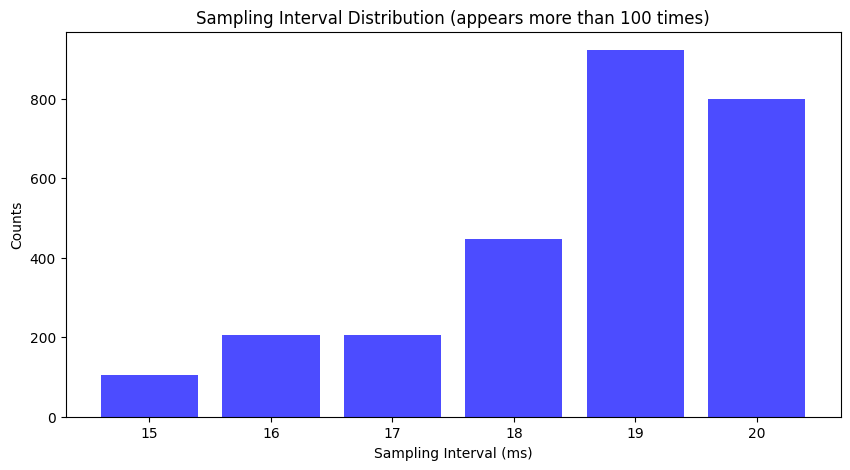

In [ ]:
values, counts = np.unique(d, return_counts=True)
print('Unique sampling intervals:\n',values)
print('Counts of unique sampling intervals:\n',counts)
print('---------------------------------')

rate_significant = values[counts > 100]
counts_significant = counts[counts > 100]
print('Intervals values that appear more than 100 times:\n', rate_significant)    
print('Counts of most frequent sampling intervals:\n', counts_significant)

# Plot the sampling intervals   
plt.figure(figsize=(10,5))
plt.bar(rate_significant, counts_significant, color='blue', alpha=0.7)
plt.xlabel('Sampling Interval (ms)')
plt.ylabel('Counts')
plt.title('Sampling Interval Distribution (appears more than 100 times)')
plt.show()



In [ ]:
most_frequent_interval_mean = np.mean(rate_significant)
print('Sampling rate (Hz) = 1 / sampling_interval(s)')
print(f'Sampling rate (Hz) = 1 / ({most_frequent_interval_mean} / 1000)')
print(f'Sampling rate (Hz) = {1000 / most_frequent_interval_mean:.2f} Hz')

Sampling rate (Hz) = 1 / sampling_interval(s)
Sampling rate (Hz) = 1 / (17.5 / 1000)
Sampling rate (Hz) = 57.14 Hz


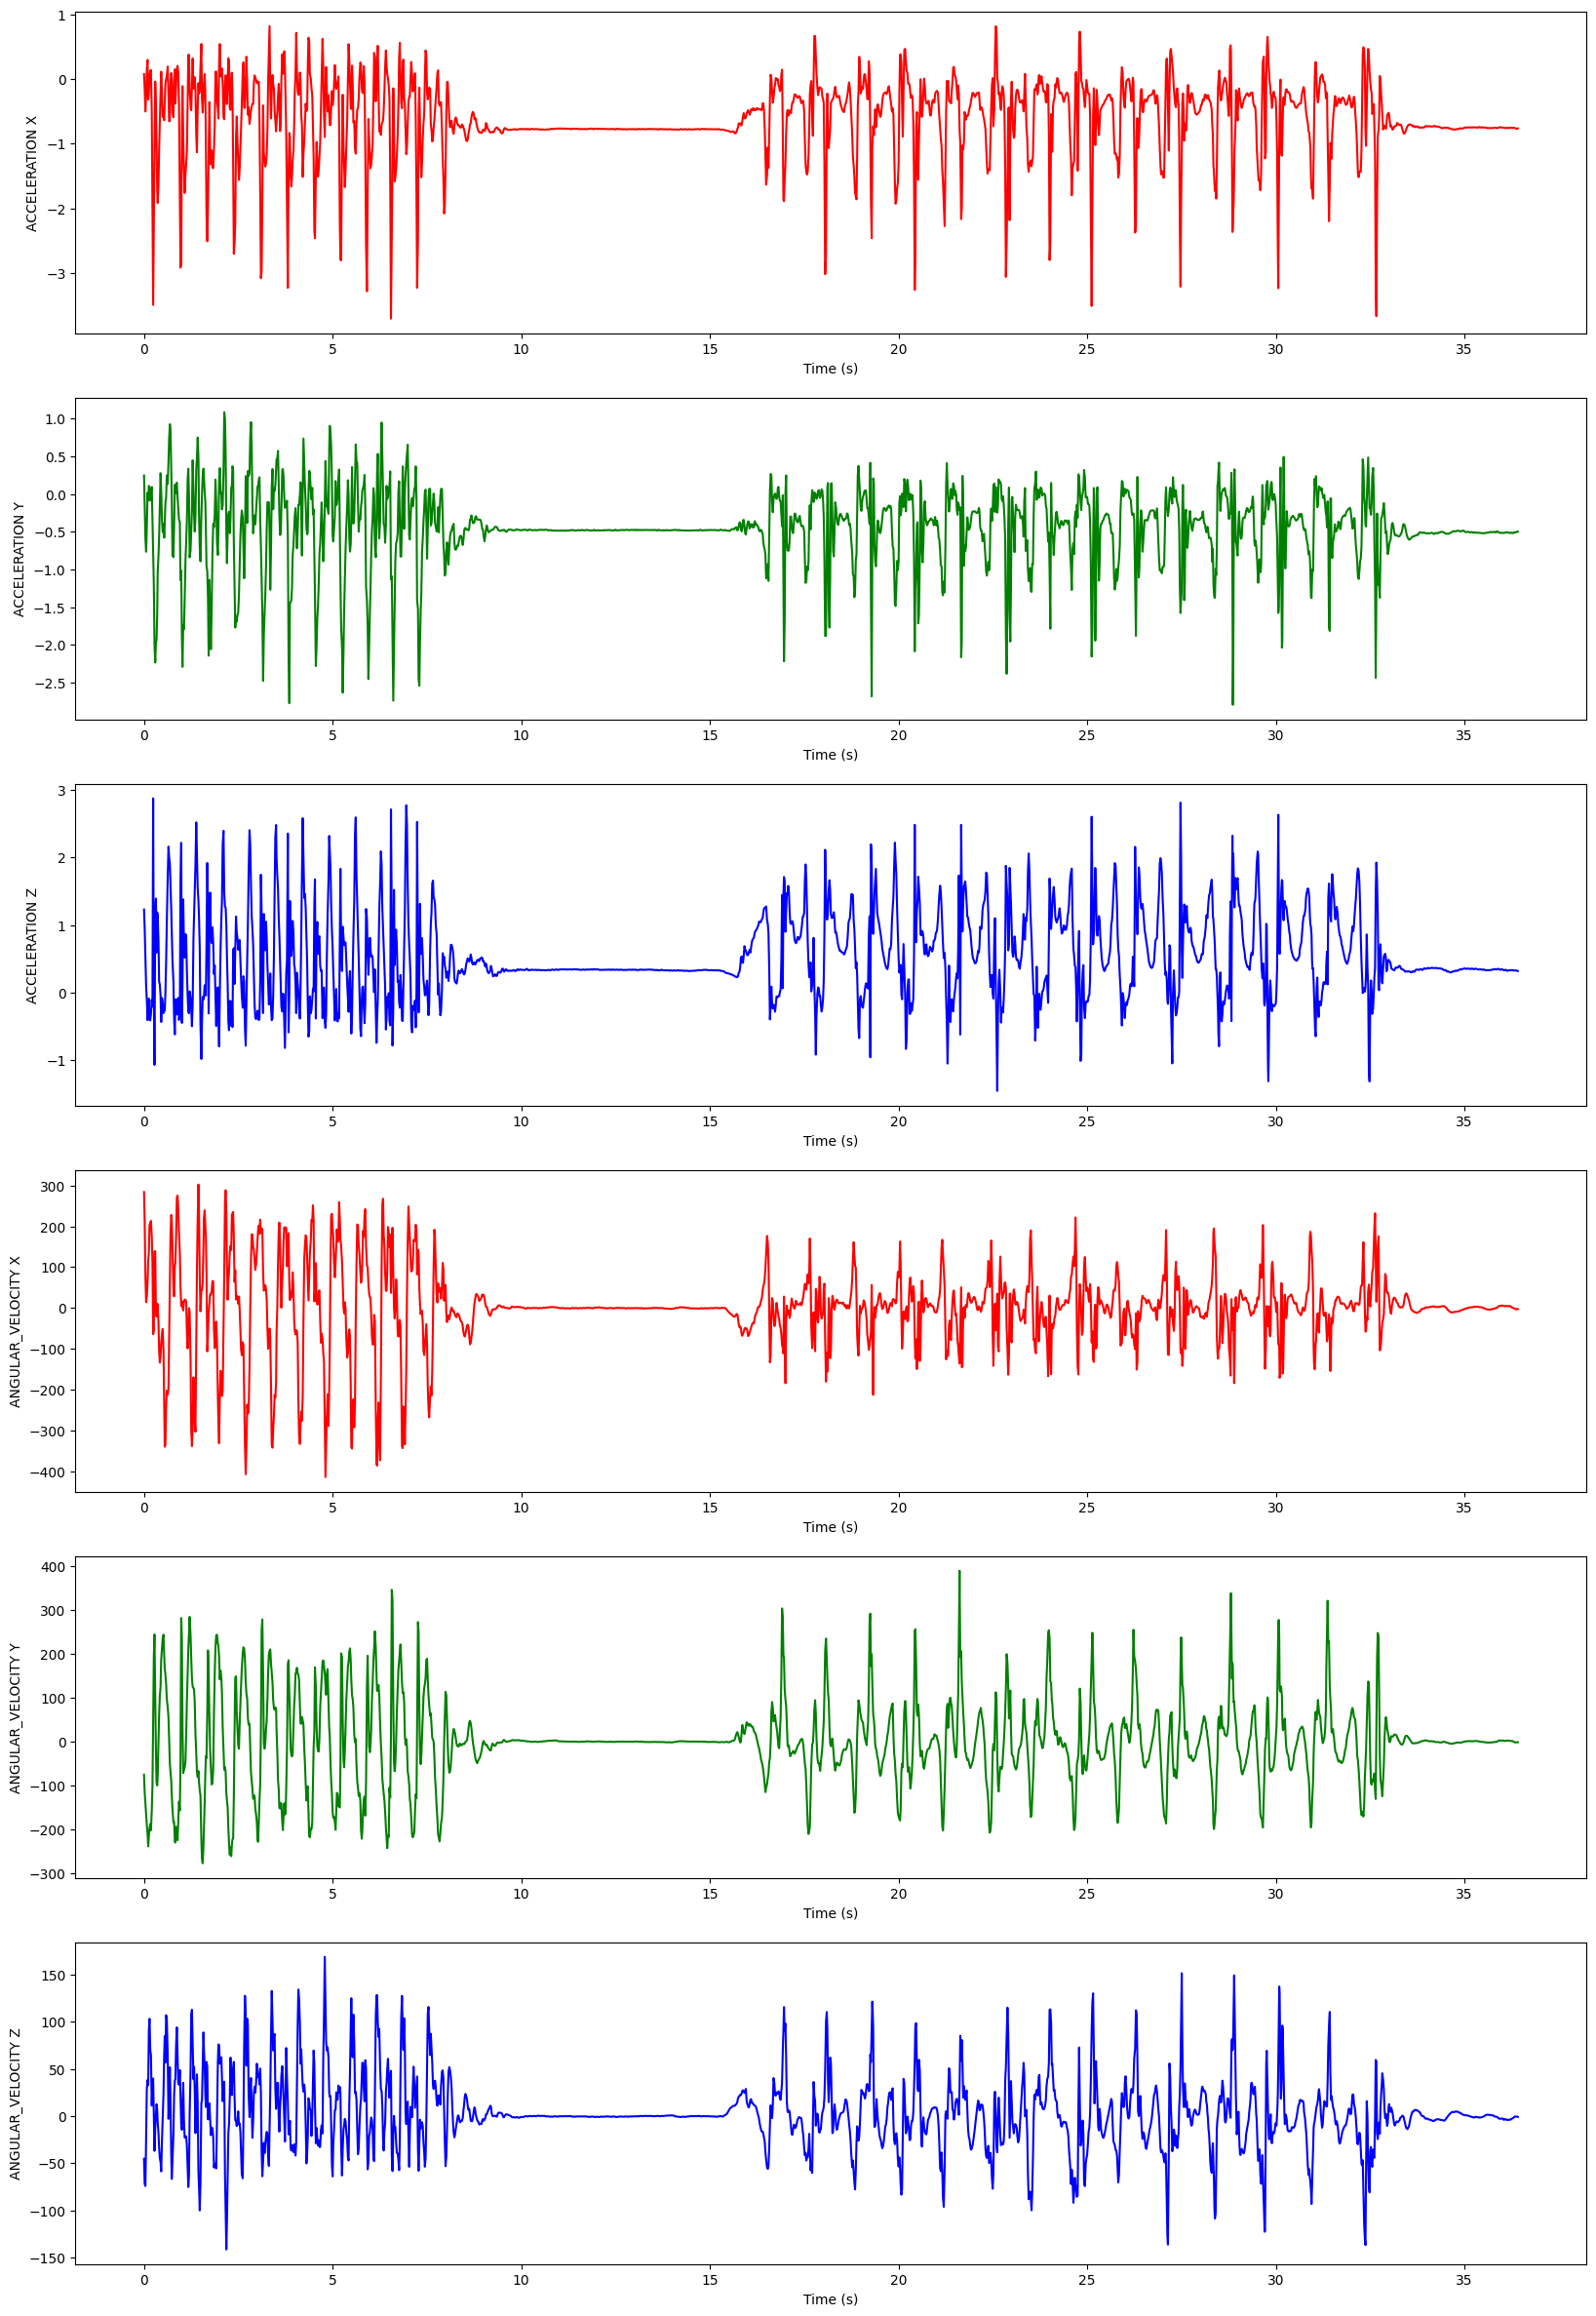

In [ ]:
data_main = data[:2000,:]
plotData2(data_main)

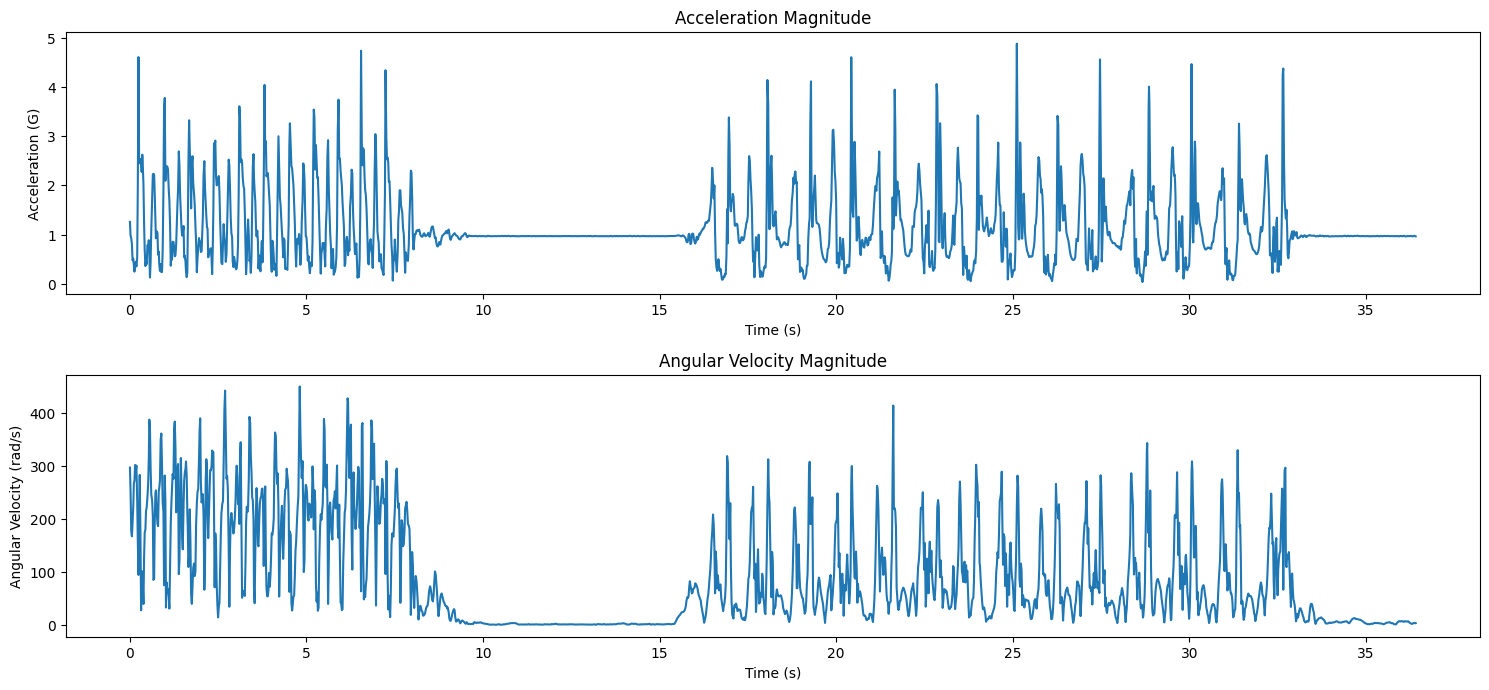

In [ ]:
def plotData(data):
    # Desciption: 
    # Plot only the Magnitude of the data

    time = data[:, 0] / 1000  # Convert milliseconds to seconds
    acceleration = data[:, 1:4]  
    angular_velocity = data[:, 4:7]  

    a_abs = np.sqrt(acceleration[:, 0]**2 + acceleration[:, 1]**2 + acceleration[:, 2]**2)
    w_abs = np.sqrt(angular_velocity[:, 0]**2 + angular_velocity[:, 1]**2 + angular_velocity[:, 2]**2)

    # Plot the data
    plt.figure(figsize=(15, 10))

    # Plot acceleration
    plt.subplot(3, 1, 1)
    plt.plot(time, a_abs)
    plt.title('Acceleration Magnitude')
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration (G)')

    # Plot angular velocity
    plt.subplot(3, 1, 2)
    plt.plot(time, w_abs)
    plt.title('Angular Velocity Magnitude')
    plt.xlabel('Time (s)')
    plt.ylabel('Angular Velocity (rad/s)')

    plt.tight_layout()
    plt.show()

plotData(data_main)

# 5. Data analysis

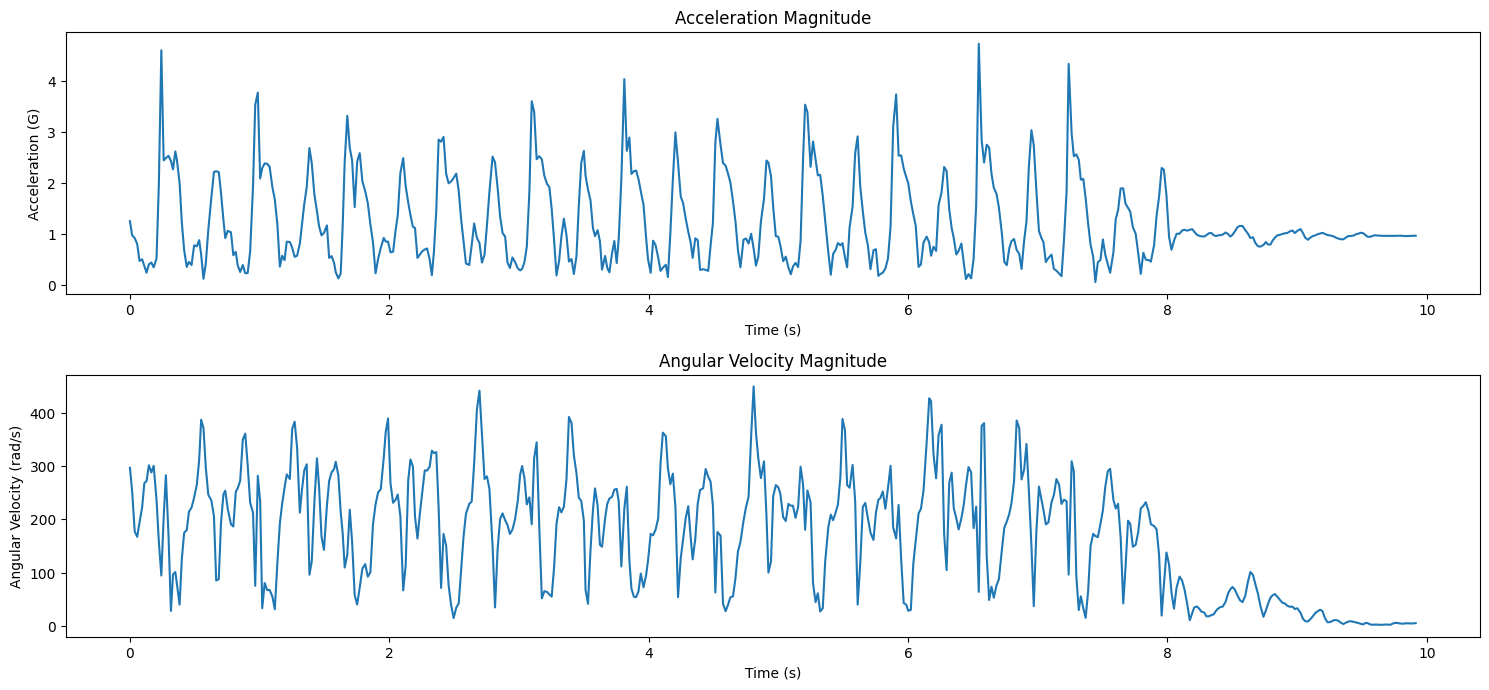

In [ ]:
running_data = data_main[:520,:]
plotData(running_data)

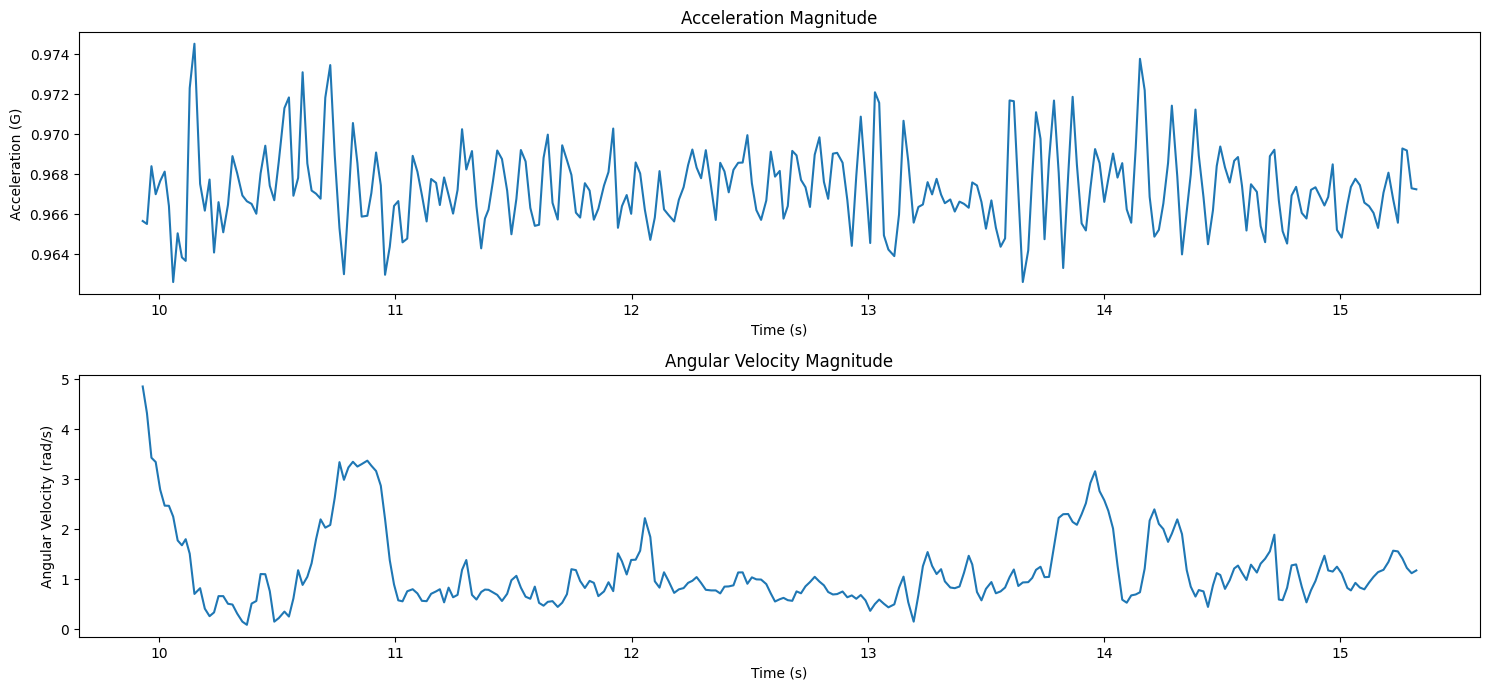

In [ ]:
standing_data = data_main[520:800,:]
plotData(standing_data)

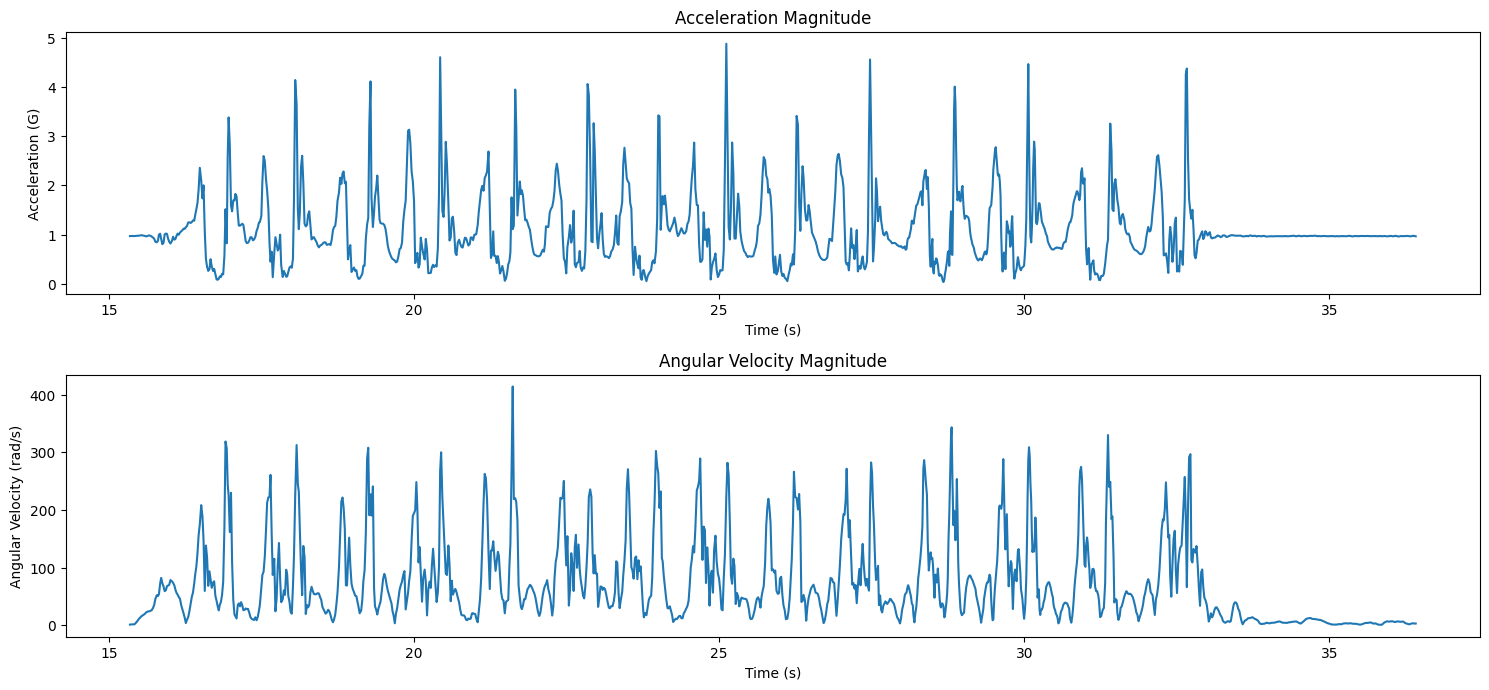

In [ ]:
jumping_data = data_main[800:,:]
plotData(jumping_data)

In [ ]:
df = pd.DataFrame(data_main, columns=['timestamp', 'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
df['acc_magnitude'] = np.sqrt(df['acc_x']**2 + df['acc_y']**2 + df['acc_z']**2)
df['gyro_magnitude'] = np.sqrt(df['gyro_x']**2 + df['gyro_y']**2 + df['gyro_z']**2)

df.head()

,timestamp,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,acc_magnitude,gyro_magnitude
0,0.0,0.078125,0.246704,1.229126,283.874512,-75.622559,-45.288082,1.256072,297.244882
1,17.0,-0.139038,-0.116211,0.963745,213.317856,-115.051262,-72.143555,0.980633,252.875450
2,37.0,-0.499268,-0.593262,0.501587,76.538086,-141.296387,-74.218750,0.923481,177.006131
3,56.0,-0.246948,-0.764038,0.081543,14.099120,-164.855942,-25.024412,0.807085,167.339439
4,74.0,0.139526,-0.442383,-0.109131,28.076170,-190.307602,28.869627,0.476529,194.521747


In [ ]:
df_running = df.iloc[:520]
df_standing = df.iloc[520:800]
df_jumping = df.iloc[800:]

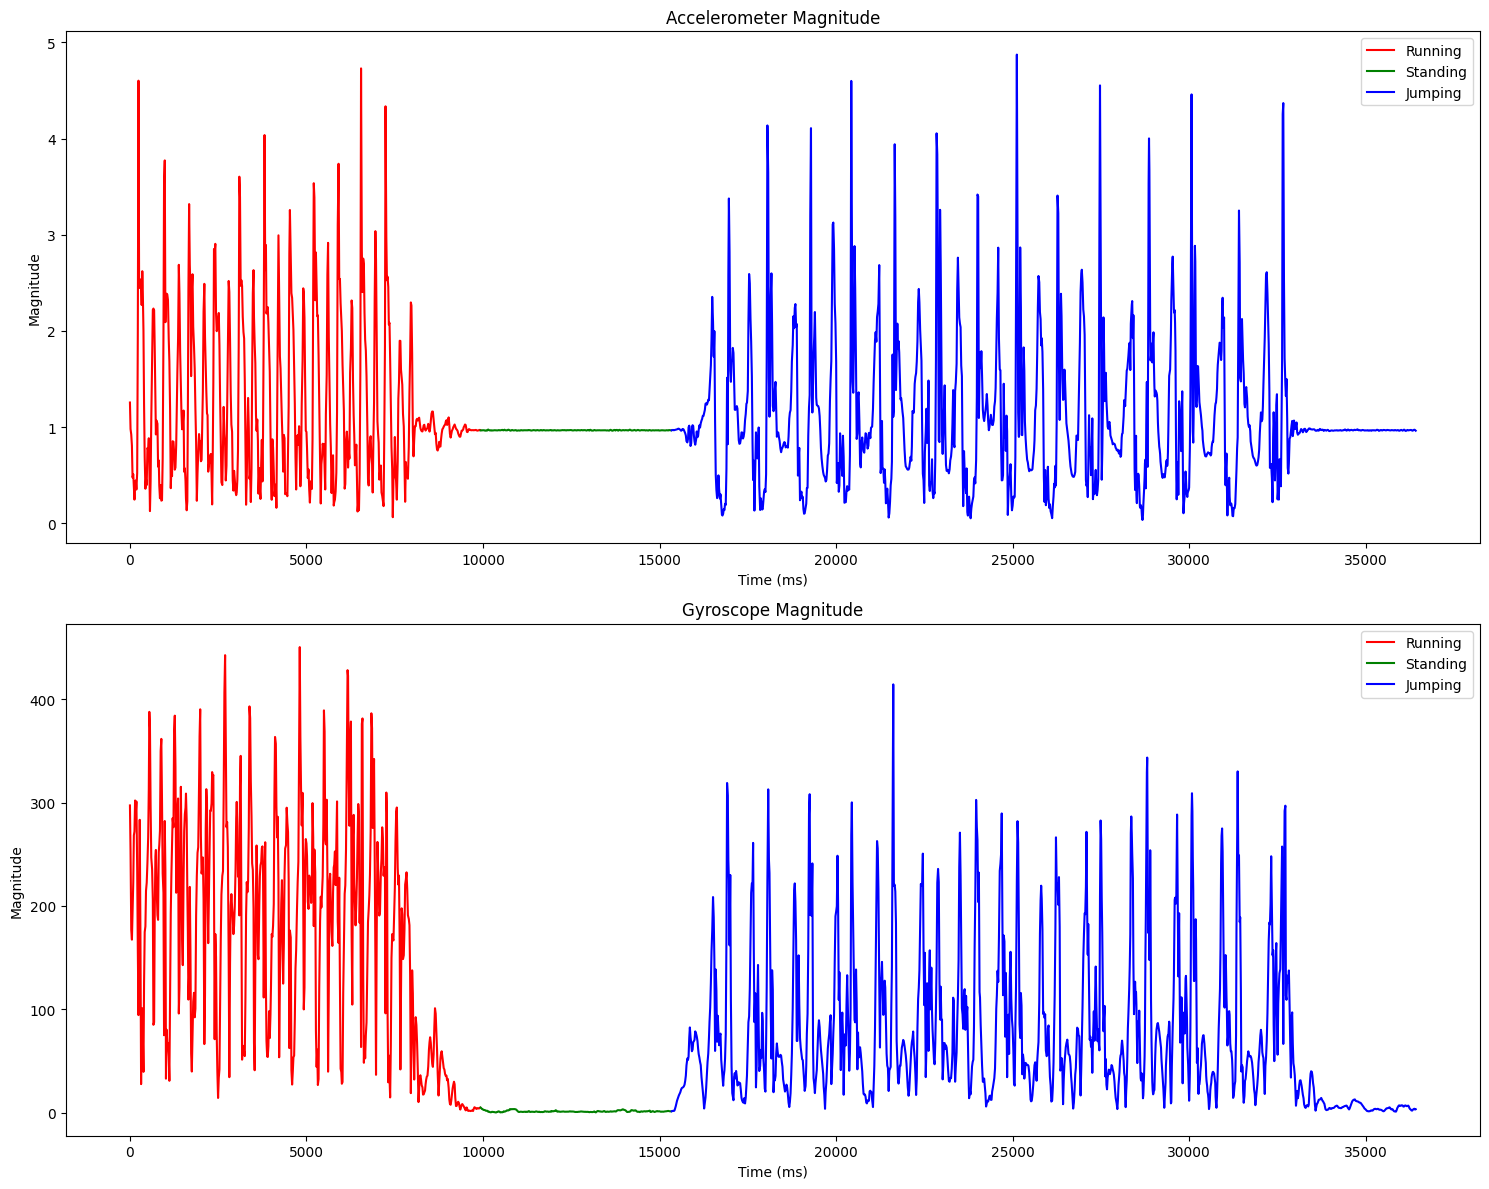

In [ ]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 1, 1)
plt.plot(df_running['timestamp'], df_running['acc_magnitude'], c='r', label='Running')
plt.plot(df_standing['timestamp'], df_standing['acc_magnitude'], c='g', label='Standing')   
plt.plot(df_jumping['timestamp'], df_jumping['acc_magnitude'], c='b', label='Jumping')
plt.title('Accelerometer Magnitude')
plt.xlabel('Time (ms)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df_running['timestamp'], df_running['gyro_magnitude'], c='r', label='Running')
plt.plot(df_standing['timestamp'], df_standing['gyro_magnitude'], c='g', label='Standing')   
plt.plot(df_jumping['timestamp'], df_jumping['gyro_magnitude'], c='b', label='Jumping')
plt.title('Gyroscope Magnitude')
plt.xlabel('Time (ms)')
plt.ylabel('Magnitude')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
df_running.describe()

,timestamp,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,acc_magnitude,gyro_magnitude
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,4928.400000,-0.615982,-0.432257,0.449218,2.938490,-2.742004,12.470186,1.240322,170.043279
std,2876.424804,0.706186,0.650943,0.728093,148.243206,129.815309,44.482491,0.825068,109.582457
min,0.000000,-3.705444,-2.771606,-1.076660,-413.940399,-277.709961,-141.479492,0.063623,1.441774
25%,2433.000000,-0.831238,-0.645233,-0.080353,-63.446041,-100.616447,-13.870238,0.657219,62.308480
50%,4915.500000,-0.599365,-0.395447,0.322083,5.371094,-3.662109,5.676269,0.977405,187.285255
75%,7412.000000,-0.108612,-0.001770,0.806976,106.201164,95.535271,37.963867,1.785349,253.202605
max,9914.000000,0.822876,1.085449,2.879272,302.185059,346.496552,168.823227,4.730492,450.505970


In [ ]:
df_jumping.describe()

,timestamp,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,acc_magnitude,gyro_magnitude
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,26219.319167,-0.561052,-0.436182,0.610985,0.560404,0.878906,-1.050924,1.101494,75.583382
std,5956.089004,0.549488,0.423451,0.607518,57.672169,79.669825,35.940863,0.717702,72.454719
min,15345.000000,-3.667114,-2.792358,-1.463745,-212.585434,-210.815414,-136.901855,0.034925,0.933658
25%,21095.250000,-0.753418,-0.535461,0.297943,-17.349243,-38.314819,-16.235352,0.656401,21.496486
50%,26857.000000,-0.443054,-0.399414,0.504700,2.166748,-0.671387,-0.793457,0.967099,53.821622
75%,30974.750000,-0.234222,-0.194702,1.037872,21.896360,31.326292,14.343261,1.342829,103.236365
max,36413.000000,0.819458,0.493286,2.817139,231.689438,390.075653,151.489258,4.873907,414.423455


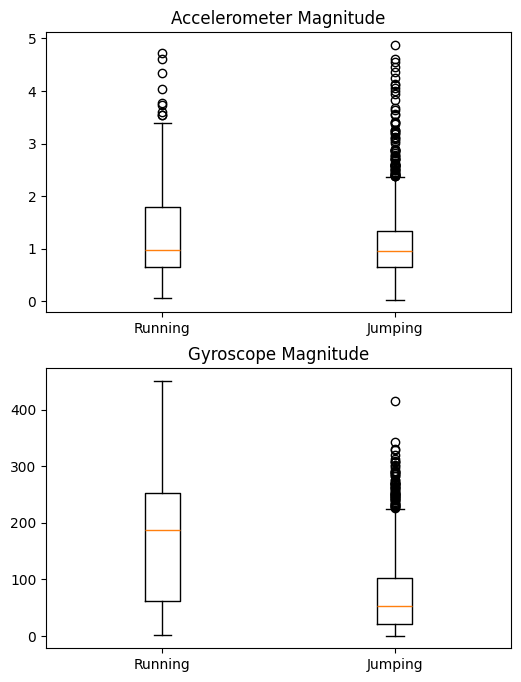

In [ ]:
plt.figure(figsize=(6, 8))
plt.subplot(2, 1, 1)
plt.boxplot([df_running['acc_magnitude'], df_jumping['acc_magnitude']],)
plt.xticks([1, 2], ['Running', 'Jumping'])
plt.title('Accelerometer Magnitude')

plt.subplot(2, 1, 2)
plt.boxplot([df_running['gyro_magnitude'], df_jumping['gyro_magnitude']],)
plt.xticks([1, 2], ['Running', 'Jumping'])
plt.title('Gyroscope Magnitude')
plt.show()

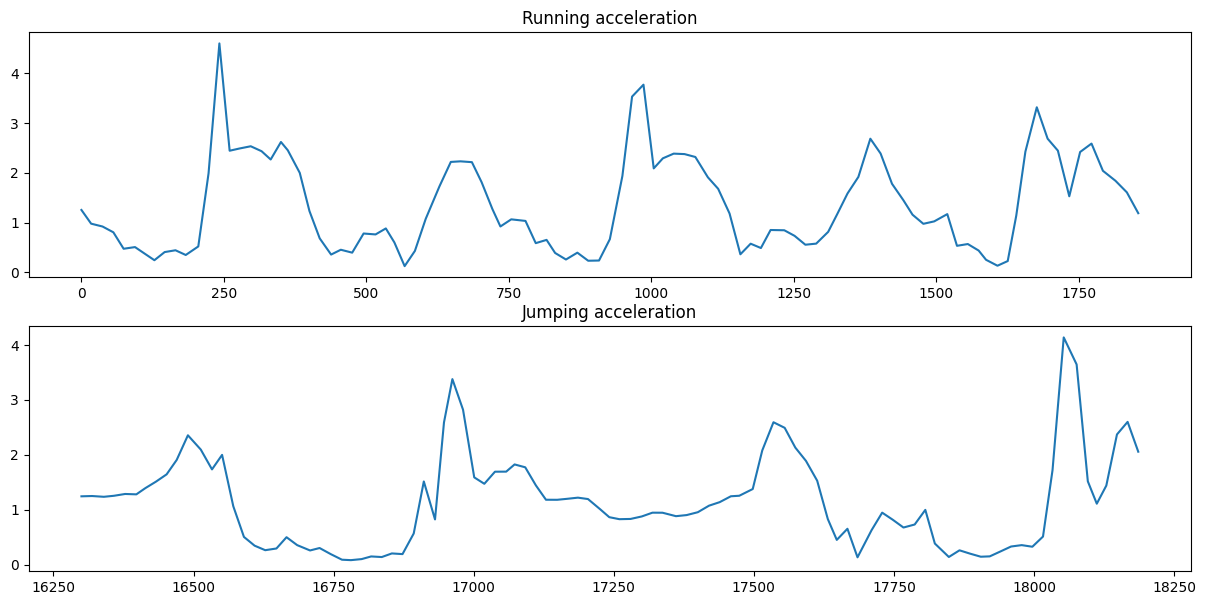

In [ ]:
running_small = df_running[:100]
jumping_small = df_jumping[50:150]
plt.figure(figsize=(15, 7))
plt.subplot(2, 1, 1)
plt.plot(running_small['timestamp'], running_small['acc_magnitude'])
plt.title('Running acceleration')
plt.subplot(2, 1, 2)
plt.plot(jumping_small['timestamp'], jumping_small['acc_magnitude'])
plt.title('Jumping acceleration')
plt.show()

# 6. Detection algorithms

## Threshold detection method

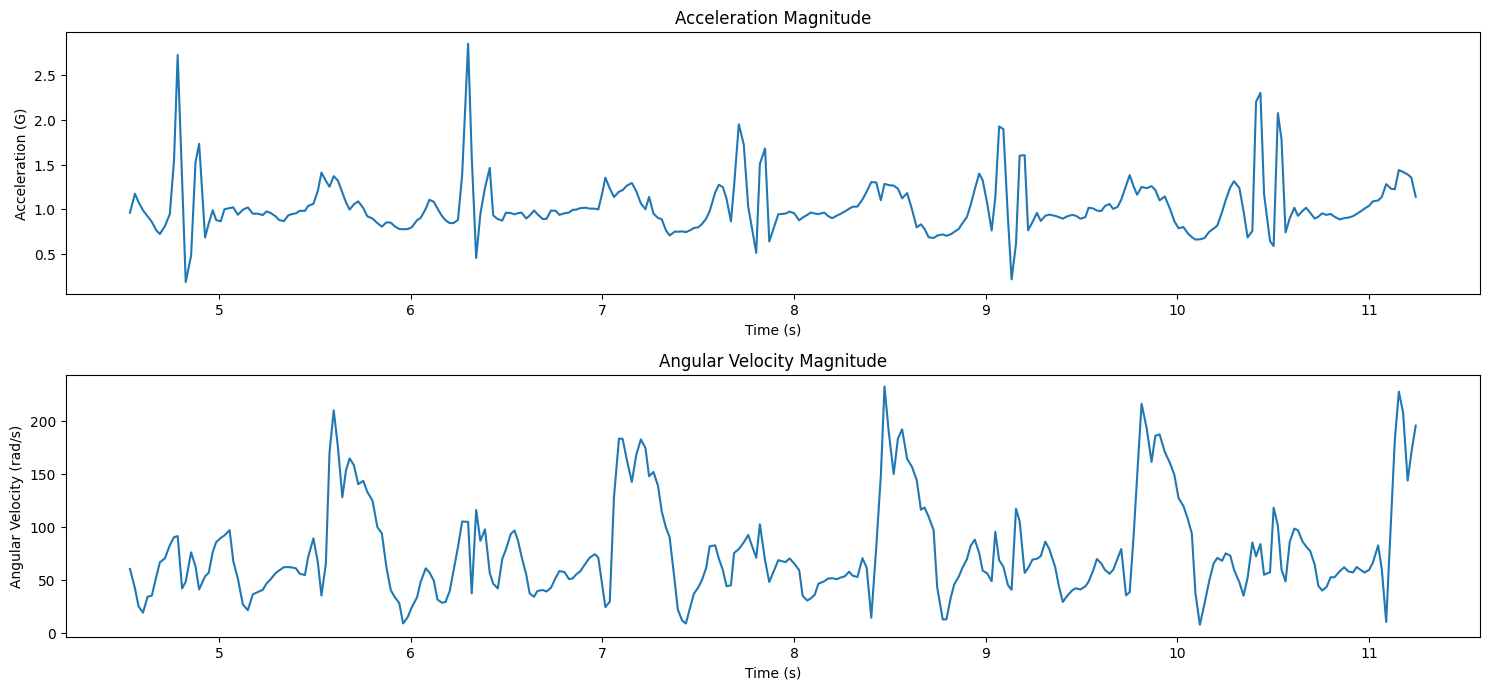

In [ ]:
plotData(walking_data[200:500])

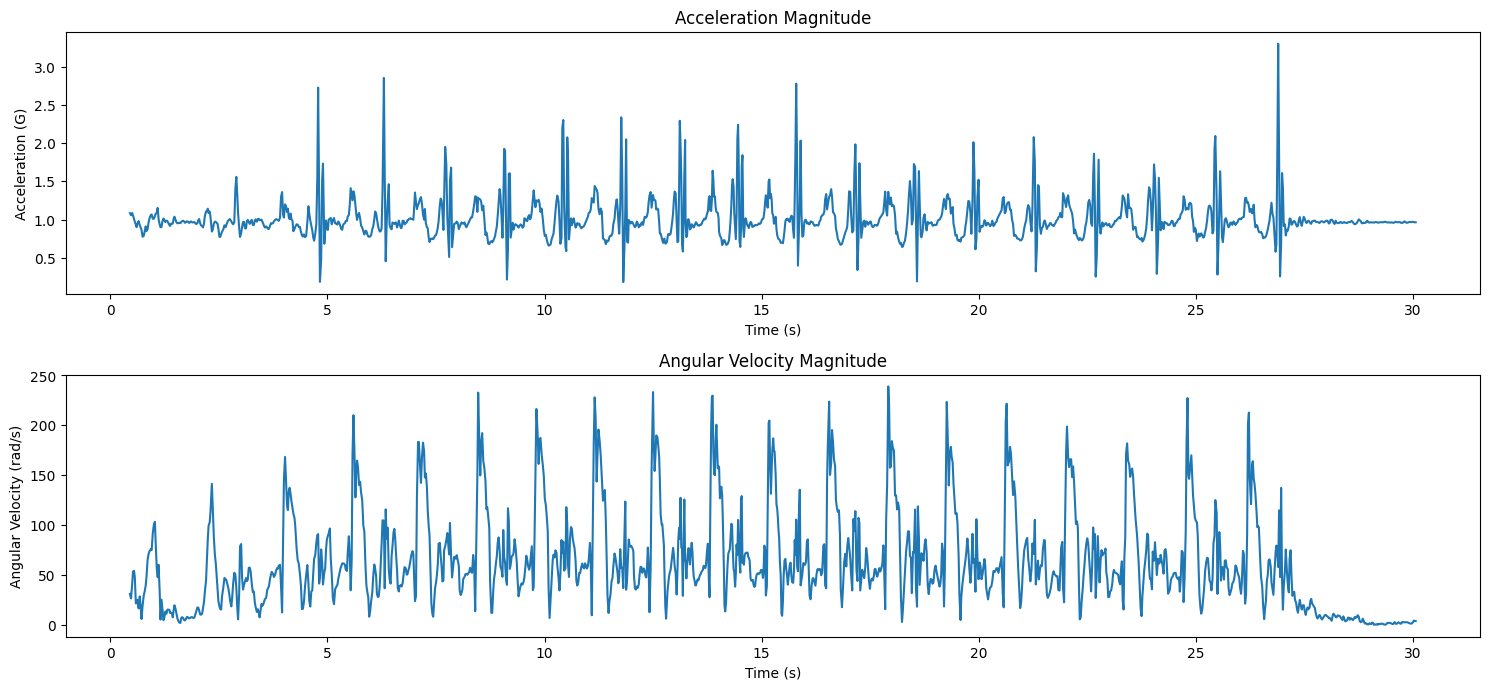

In [ ]:
plotData(walking_data[20:])

Total steps detected: 36


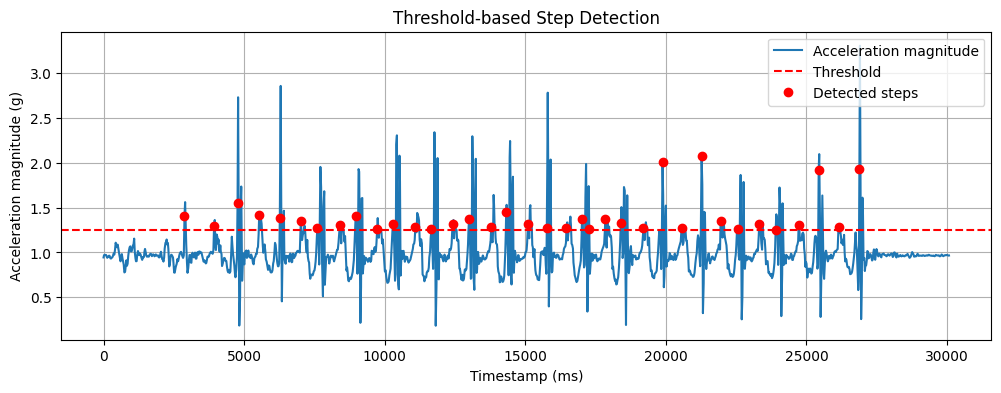

In [ ]:
df_walking = pd.DataFrame(walking_data, columns=['timestamp', 'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
df_walking['acc_magnitude'] = np.sqrt(df_walking['acc_x']**2 + df_walking['acc_y']**2 + df_walking['acc_z']**2)
df_walking['gyro_magnitude'] = np.sqrt(df_walking['gyro_x']**2 + df_walking['gyro_y']**2 + df_walking['gyro_z']**2)

UPPER_THRESHOLD = 1.25        
STEP_DELAY_MS = 250     
last_step_time = -np.inf
step_count = 0
step_indices = []

for i in range(len(df_walking)):
    a = df_walking['acc_magnitude'].iloc[i]
    t = df_walking['timestamp'].iloc[i]

    if a > UPPER_THRESHOLD and (t - last_step_time) > STEP_DELAY_MS:
        step_count += 1
        last_step_time = t
        step_indices.append(i)

print(f'Total steps detected: {step_count}')

plt.figure(figsize=(12, 4))
plt.plot(df_walking['timestamp'], df_walking['acc_magnitude'], label='Acceleration magnitude')
plt.axhline(y=UPPER_THRESHOLD, color='r', linestyle='--', label='Threshold')

plt.plot(df_walking['timestamp'].iloc[step_indices], df_walking['acc_magnitude'].iloc[step_indices],
         'ro', label='Detected steps')

plt.xlabel("Timestamp (ms)")
plt.ylabel("Acceleration magnitude (g)")
plt.legend()
plt.title("Threshold-based Step Detection")
plt.grid(True)
plt.show()

## Peaks detection method

Number of steps detected: 35


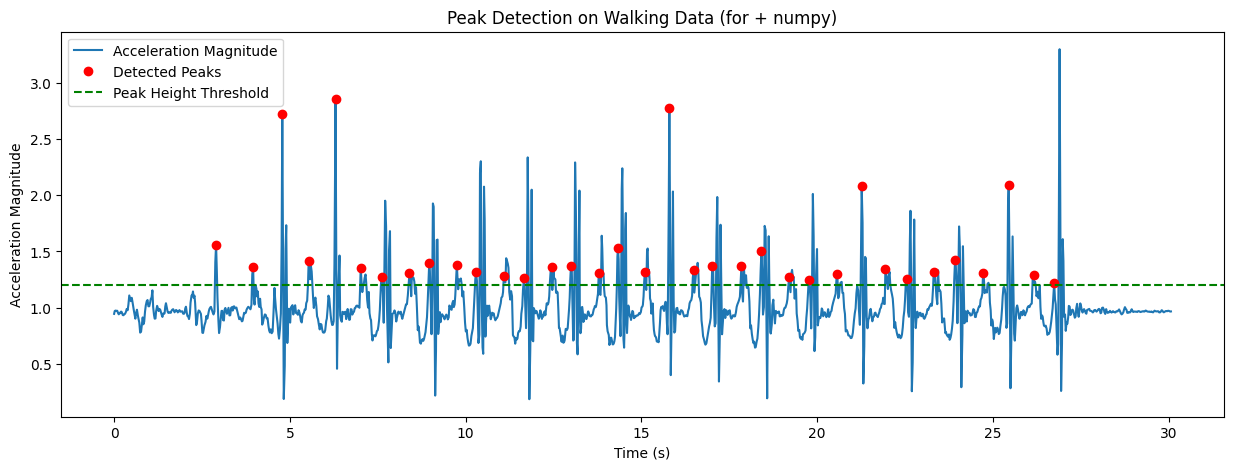

In [ ]:
PEAK_HEIGHT = 1.2  
PEAK_DISTANCE = 14  

peaks = []
last_peak_idx = -PEAK_DISTANCE

acc_magnitude = df_walking['acc_magnitude']

for i in range(1, len(acc_magnitude) - 1):
    if (
        acc_magnitude[i] > PEAK_HEIGHT and
        acc_magnitude[i] > acc_magnitude[i - 1] and
        acc_magnitude[i] > acc_magnitude[i + 1] and
        (i - last_peak_idx) >= PEAK_DISTANCE
    ):
        peaks.append(i)
        last_peak_idx = i

print(f"Number of steps detected: {len(peaks)}")

plt.figure(figsize=(15, 5))
plt.plot(walking_data[:, 0] / 1000, acc_magnitude, label='Acceleration Magnitude')
plt.plot(walking_data[peaks, 0] / 1000, acc_magnitude[peaks], 'ro', label='Detected Peaks')
plt.axhline(PEAK_HEIGHT, color='g', linestyle='--', label='Peak Height Threshold')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration Magnitude')
plt.title('Peak Detection on Walking Data (for + numpy)')
plt.legend()
plt.show()